#**Challenge Alura Store**
### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



##Debes evaluar información como los ingresos, las categorías más vendidas, las reseñas de los clientes, los productos más vendidos y el envío promedio.

In [2]:
total_store = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
total_store.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
total_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [4]:
total_store['Ingresos'] = total_store['Precio'] + total_store['Costo de envío']
display(total_store.head())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingresos
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,355400.0


In [6]:
total_store['Ingresos'].sum()

np.float64(4638316200.0)

In [8]:
pd.options.display.float_format = '{:.2f}'.format
total_store['Ingresos'].sum()

np.float64(4638316200.0)

# 2. Ventas por categoría

In [7]:
ventas_por_categoria = total_store.groupby('Categoría del Producto')['Ingresos'].sum()
display(ventas_por_categoria)

,Ingresos
Categoría del Producto,
Artículos para el hogar,6.069090e+07
Deportes y diversión,1.506693e+08
Electrodomésticos,1.395147e+09
Electrónicos,1.749039e+09
Instrumentos musicales,3.672769e+08
Juguetes,7.762570e+07
Libros,3.975600e+07
Muebles,7.981114e+08


In [9]:
pd.options.display.float_format = '{:.2f}'.format
display(ventas_por_categoria)

,Ingresos
Categoría del Producto,
Artículos para el hogar,60690900.00
Deportes y diversión,150669300.00
Electrodomésticos,1395147400.00
Electrónicos,1749038600.00
Instrumentos musicales,367276900.00
Juguetes,77625700.00
Libros,39756000.00
Muebles,798111400.00


# 3. Calificación promedio de la tienda


In [11]:
calificacion_store = total_store.groupby('Vendedor')['Calificación'].mean()
display(calificacion_store)

,Calificación
Vendedor,
Beatriz Morales,4.05
Blanca Ramirez,3.99
Camila Rivera,4.03
Felipe Santos,4.08
Izabela de León,3.86
Juan Fernandez,4.03
Juliana Costa,3.92
Lucas Olivera,3.96
Maria Alfonso,3.96


In [12]:
mejores_vendedores = calificacion_store.sort_values(ascending=False)
display(mejores_vendedores)

,Calificación
Vendedor,
Ángel Rodriguez,4.13
Felipe Santos,4.08
Mariana Herrera,4.07
Rafael Acosta,4.06
Beatriz Morales,4.05
Pedro Gomez,4.04
Juan Fernandez,4.03
Camila Rivera,4.03
Santiago Silva,4.03


# 4. Productos más y menos vendidos

In [15]:
producto_mas_vendido = total_store['Producto'].value_counts()
display(producto_mas_vendido)

,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199


In [16]:
producto_menos_vendido = total_store['Producto'].value_counts(ascending=True)
display(producto_menos_vendido)

,count
Producto,
Celular ABXY,157
Auriculares con micrófono,158
Mochila,163
Guitarra eléctrica,165
Ciencia de datos con Python,166
Asistente virtual,167
Sillón,168
Set de vasos,169
Smartwatch,172


# 5. Envío promedio por tienda

In [18]:
total_store

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Ingresos
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,171200.00
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,200700.00
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,225500.00
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,798500.00
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,355400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.00,12600.00,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25,-75.56,240300.00
9431,Silla de oficina,Muebles,342000.00,18600.00,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.13,-73.12,360600.00
9432,Vaso térmico,Deportes y diversión,36700.00,2400.00,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.61,-74.08,39100.00
9433,Set de ollas,Artículos para el hogar,151800.00,8300.00,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.44,-76.52,160100.00


In [21]:
envio_por_tienda = total_store.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)
display(envio_por_tienda)

,Costo de envío
Lugar de Compra,
Soacha,34768.42
Inírida,30557.14
Cúcuta,28597.31
Pasto,27801.06
Neiva,27710.00
Bucaramanga,26790.06
Cali,26726.81
Leticia,25317.61
Medellín,25282.02


#**CREAR GRÁFICOS PARA VISUALIZACIÓN**

      1.   Decide qué tipo de gráficos utilizar para presentar los resultados de forma clara y visual.
      2.   Mínimo 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.



In [29]:
!pip install squarify
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


In [23]:
#Para elaborar un gráfico de barras con [lugar de compra] e [ingresos]
ingresos_por_lugar = total_store.groupby('Lugar de Compra')['Ingresos'].sum().sort_values(ascending=False)

/tmp/ipython-input-1746153734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingresos_por_lugar.index, y=ingresos_por_lugar.values, palette='viridis')


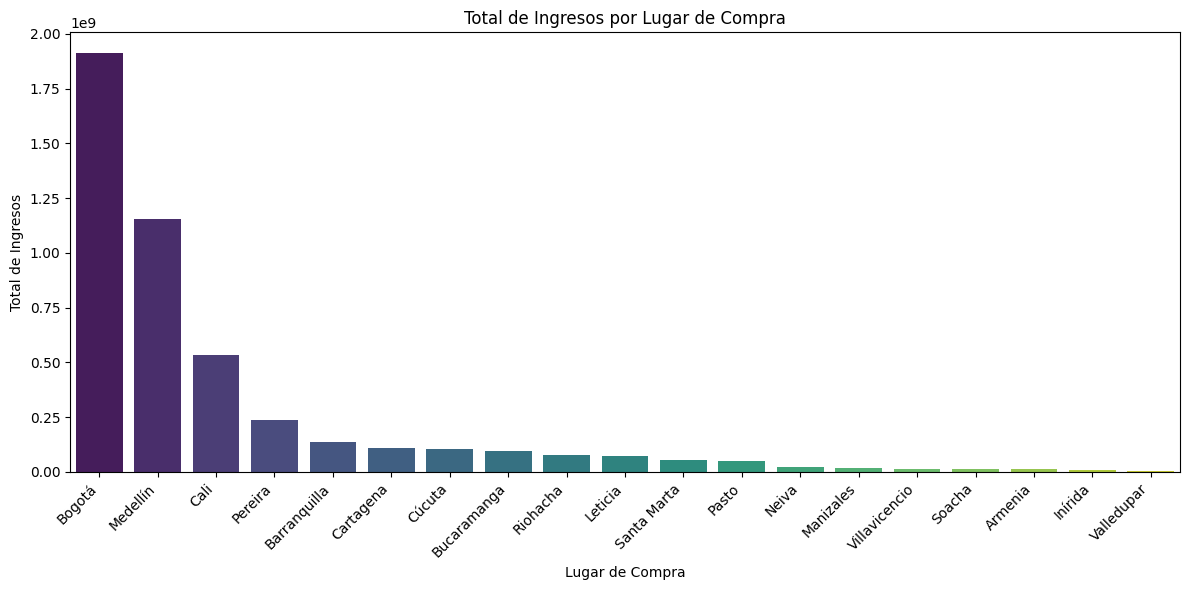

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ingresos_por_lugar.index, y=ingresos_por_lugar.values, palette='viridis')
plt.title('Total de Ingresos por Lugar de Compra')
plt.xlabel('Lugar de Compra')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el total de ingresos por lugar de compra
ingresos_por_lugar = total_store.groupby('Lugar de Compra')['Ingresos'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=ingresos_por_lugar.index, y=ingresos_por_lugar.values, palette='viridis')
plt.title('Total de Ingresos por Lugar de Compra')
plt.xlabel('Lugar de Compra')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##El gráfico de barras nos dice que Bogota, Medellín y Calí son las tiendas con mayores ingresos.

In [31]:
total_store['Producto'].unique()

array(['Asistente virtual', 'Mesa de comedor', 'Juego de mesa',
       'Microondas', 'Silla de oficina', 'Bloques de construcción',
       'Muñeca bebé', 'Lavavajillas', 'Lavadora de ropa',
       'Carrito de control remoto', 'Refrigerador', 'Auriculares',
       'Olla de presión', 'Bicicleta', 'Ciencia de datos con Python',
       'Balón de voleibol', 'Ajedrez de madera', 'TV LED UHD 4K',
       'Vaso térmico', 'Kit de bancas', 'Dashboards con Power BI',
       'Cubertería', 'Set de ollas', 'Batería', 'Cuerda para saltar',
       'Estufa', 'Cama box', 'Impresora', 'Mesa de noche', 'Armario',
       'Dinosaurio Rex', 'Guitarra eléctrica', 'Secadora de ropa',
       'Sofá reclinable', 'Tablet ABXY', 'Cubo mágico 8x8',
       'Set de vasos', 'Modelado predictivo', 'Iphone 15', 'Mochila',
       'Balón de baloncesto', 'Auriculares con micrófono', 'Sillón',
       'Guitarra acústica', 'Iniciando en programación', 'Celular ABXY',
       'Smartwatch', 'Mesa de centro', 'Cama king', 'Smart TV

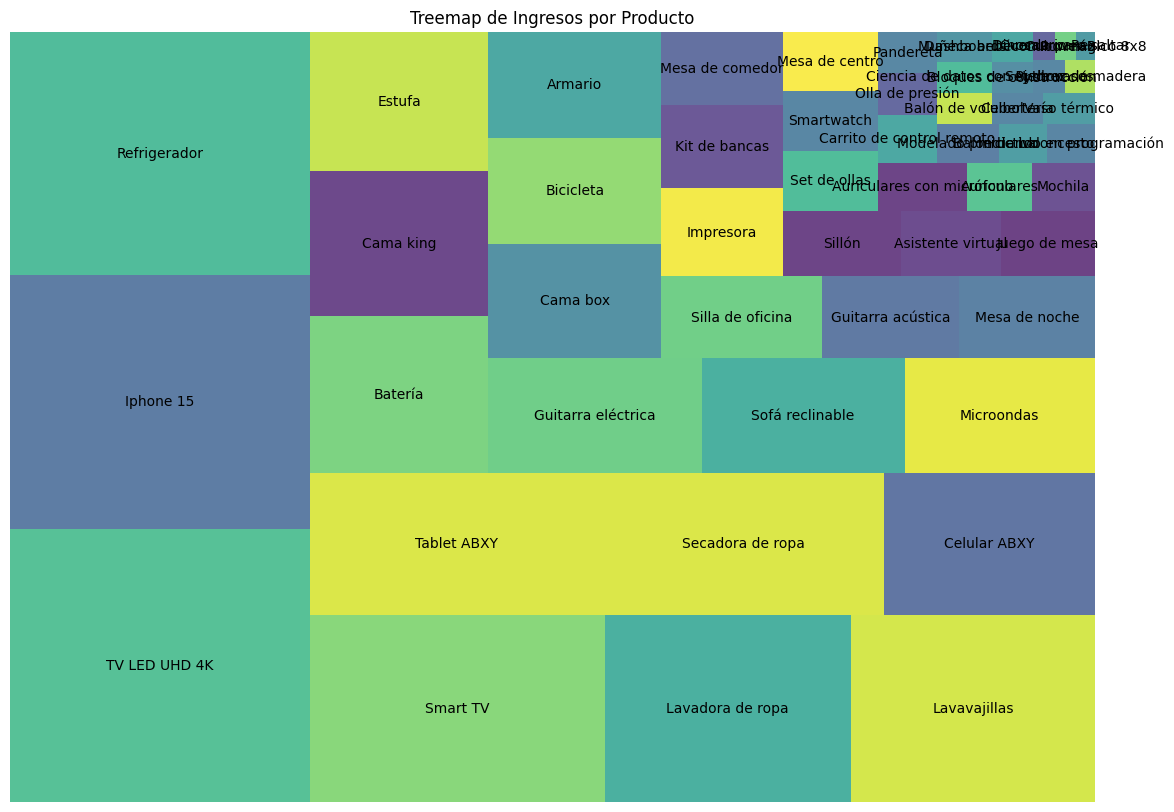

In [34]:
# Calcular los ingresos por producto
ingresos_por_producto = total_store.groupby('Producto')['Ingresos'].sum().sort_values(ascending=False)


# Crear el treemap
plt.figure(figsize=(14, 10))
squarify.plot(sizes=ingresos_por_producto.values, label=ingresos_por_producto.index, alpha=.8)
plt.title('Treemap de Ingresos por Producto')
plt.axis('off')
plt.show()

##Del gráfico de mapa de arbol o treemap, podemos concluir que los productos con mayor venta fueron:
      Refrigerador
      Iphone 15
      TV Led UHD 4K

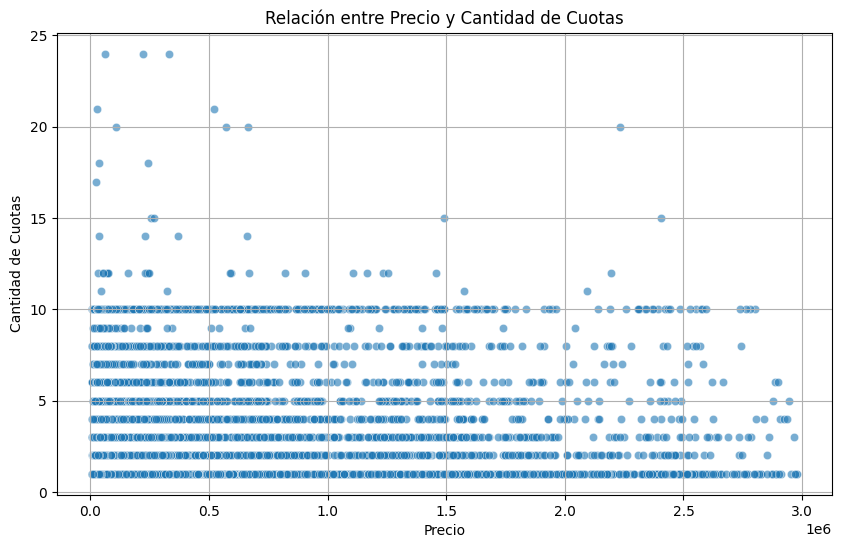

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_store, x='Precio', y='Cantidad de cuotas', alpha=0.6)
plt.title('Relación entre Precio y Cantidad de Cuotas')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Cuotas')
plt.grid(True)
plt.show()

##En el gráfico de dispeción nos muestra que no existe una relación entre el precio del producto con el diferimiento de cuotas. Es decir, que no importa si el precios es alto o bajo, las cuotas pueden ser de menos o más sin importar el precio.

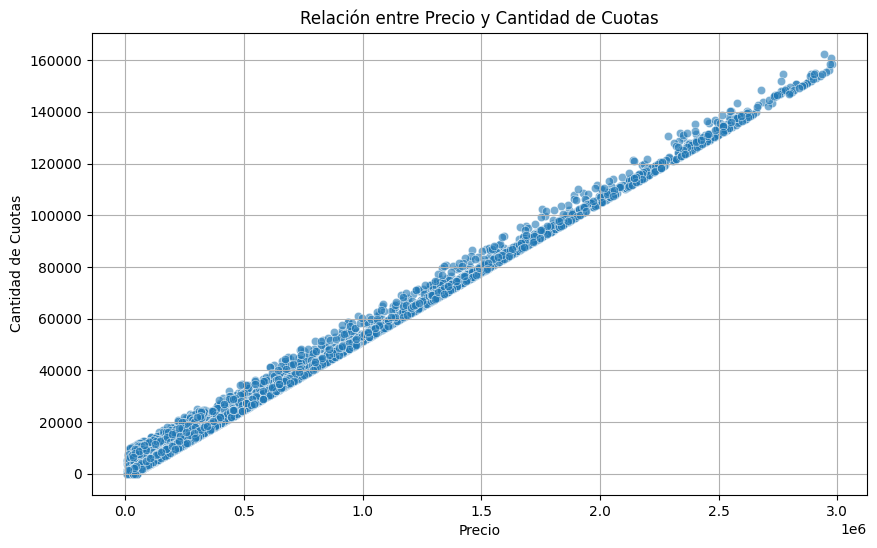

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_store, x='Precio', y='Costo de envío', alpha=0.6)
plt.title('Relación entre Precio y Cantidad de Cuotas')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Cuotas')
plt.grid(True)
plt.show()

##El gráfico de disperción del precio y el costo de envío nos muestra una fuerte correlación. Esto quiere decir que el costo de envío es proporcional al valor del precio. Y eso es correcto, no cuesta lo mismo enviar un refigerador que enviar un microondas o celular.

In [39]:
total_store.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Ingresos'],
      dtype='object')

In [41]:
ingresos_por_tienda = total_store.groupby('Lugar de Compra')['Ingresos'].sum().sort_values(ascending=False)
display(ingresos_por_tienda)

,Ingresos
Lugar de Compra,
Bogotá,1911588300.00
Medellín,1155171800.00
Cali,533440000.00
Pereira,237927600.00
Barranquilla,139075100.00
Cartagena,107855200.00
Cúcuta,104688200.00
Bucaramanga,95422300.00
Riohacha,77812500.00


In [43]:
calificacion_promedio = total_store.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)
display(calificacion_promedio)


,Calificación
Lugar de Compra,
Pasto,4.15
Bogotá,4.11
Valledupar,4.07
Cali,4.05
Cartagena,4.02
Pereira,4.01
Bucaramanga,3.98
Cúcuta,3.94
Medellín,3.93


In [44]:
resumen_tiendas = total_store.groupby('Lugar de Compra').agg({
    'Ingresos': 'sum',
    'Calificación': 'mean'
}).sort_values(by='Ingresos', ascending=False)
print(resumen_tiendas)


                     Ingresos  Calificación
Lugar de Compra                            
Bogotá          1911588300.00          4.11
Medellín        1155171800.00          3.93
Cali             533440000.00          4.05
Pereira          237927600.00          4.01
Barranquilla     139075100.00          3.80
Cartagena        107855200.00          4.02
Cúcuta           104688200.00          3.94
Bucaramanga       95422300.00          3.98
Riohacha          77812500.00          3.90
Leticia           70745000.00          3.92
Santa Marta       55932100.00          3.60
Pasto             51627600.00          4.15
Neiva             22006400.00          3.80
Manizales         20390800.00          3.63
Villavicencio     14061500.00          3.83
Soacha            12978300.00          3.89
Armenia           12883200.00          3.46
Inírida            8515700.00          3.64
Valledupar         6194600.00          4.07


#**CONCLUSIONES**

##Con los gráficos y tablas mostradas, podemos inferir que los lugares con mayor ventas son:
1. Bogotá
2. Medellín
3. Calí

Estas tres ciudades también tienen muy buena calificación por parte de los clientes. Que consumen en mayor cantidad: Refrigeradores, Iphone 15 y TV Led UHD 4K.

Se recomienda al Señor Joao seguir vendiendo a las tres tiendas, pues reportan la mayores ingresos por venta de estos 3 productos.